# OCR Evaluation, Correction, and Normalization for *The Training School Advocate* (ADV).

## Summary

(Link to title overview for more information about *The Training School Advocate*.)

The layout and typesetting of [*The Training School Advocate*]() make this a challenging title for Optical Character Recognition. In particular, this title suffers from line-ending problems, where the OCR engine was unable to recognize the dash that indicates that a word was split over a line-break. Using my [spelling_dictionary of verified words (link to discussion of creating that dictionary)](), the baseline overall average of correct tokens was 92.328%. By correcting for regular occurring OCR errors, including [removing special characters](), [addressing line-endings](), [reconnecting split words]() and [identifying and reconstructing "burst" words](), I improved the overall average to 96.56%. These changes fixed regularly occurring error patterns. In addition, I looked to improve the overall accuracy, as well as improve the dataset for clustering, by normalizing the corpus. This involves correcting some common spelling errors, some of which are caused by OCR misrecognition, and some of which are editorial mistakes in the original publication. With normalization, I was able to improve the verified token rate to 96.88%. I examined the  remaining documents that posted an above 30% error rate, and these were all title, index, and advertisement pages, all of which offer little content value for my studies. As additional interventions were providing little marginal improvement in the verified OCR rate, I decided to end my correction and normalization efforts at this point.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-03-01-Additional-Approved-Words.txt",
             "2017-02-14-Roman-Numerals.txt"]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "ADV"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

# Establishing the baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/baseline

Average verified rate: 0.9237448782373405

Average of error rates: 0.09447501892505678

Total token count: 1293500



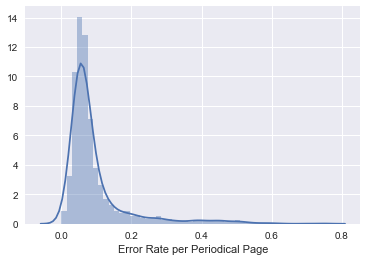

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 50 )[:50]

[('ò', 5257),
 ('ó', 5047),
 ('e', 3991),
 ('ñ', 2666),
 ('t', 2451),
 ('w', 2403),
 ('m', 1910),
 ('r', 1708),
 ('n', 1587),
 ('f', 1319),
 ('d', 1198),
 ('-', 1049),
 ('õ', 991),
 ('*', 953),
 ('tion', 815),
 ('g', 750),
 ('godõs', 682),
 ('u', 601),
 ('re', 571),
 ('ô', 528),
 ('”', 498),
 (')', 493),
 ('õõ', 459),
 ('k', 456),
 ('“', 442),
 ('^', 422),
 ("'", 419),
 ('co', 399),
 ('dren', 323),
 ('ex', 318),
 ('ment', 309),
 ('th', 306),
 ('educa', 301),
 ('chil', 294),
 ('x', 261),
 ('\ufeff', 254),
 ('(', 234),
 ('ç', 227),
 ('ers', 209),
 ('tions', 203),
 ('è', 200),
 ('¥', 176),
 ('edu', 163),
 ('ence', 162),
 ('lordõs', 155),
 ('teachersõ', 154),
 ('—', 152),
 ('pre', 144),
 ('christõs', 143),
 ('un', 142)]

# Correction 1 -- Replace "õ" with "'"

The first correction is to replace "õ" found in the middle of words with a "'".  

In [12]:
# %load shared_elements/replace_accented_o.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    with open(join(directories['prev'], filename)) as f:
        content = f.read()
        
    content = re.sub(r"(\w+)(õ|Õ)", r"\1'", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction1

Average verified rate: 0.9266633165829146

Average of error rates: 0.09163701741105224

Total token count: 1293500



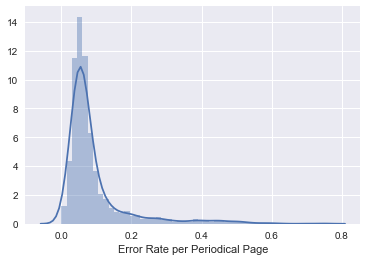

In [13]:
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [14]:
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 50 )[:50]

[('ò', 5257),
 ('ó', 5047),
 ('e', 3991),
 ('ñ', 2666),
 ('t', 2451),
 ('w', 2403),
 ('m', 1910),
 ('r', 1708),
 ('n', 1587),
 ('f', 1319),
 ('d', 1198),
 ('-', 1049),
 ('õ', 969),
 ('*', 953),
 ('tion', 815),
 ('g', 750),
 ('u', 601),
 ('re', 571),
 ('ô', 528),
 ('”', 498),
 (')', 493),
 ("õ'", 477),
 ('k', 456),
 ('“', 442),
 ("'", 441),
 ('^', 422),
 ('co', 399),
 ('dren', 323),
 ('ex', 318),
 ('ment', 309),
 ('th', 306),
 ('educa', 301),
 ('chil', 294),
 ('x', 261),
 ('\ufeff', 254),
 ('(', 234),
 ('ç', 227),
 ('ers', 209),
 ('tions', 203),
 ('è', 200),
 ('¥', 176),
 ('edu', 163),
 ('ence', 162),
 ('—', 152),
 ('pre', 144),
 ('un', 142),
 ('ac', 131),
 ('«', 130),
 ('ôô', 130),
 ('mis', 129)]

Next step will be to remove special characters. First, rather than assume that everything uses the English alphabet, I am filtering for tokens with special characters and sorting by frequency. This allows me to quickly gage if there is a regular use of languages other than English. If yes, we need to preserve those characters in use. If not, we can remove all special characters.

## Review Special Characters

In [15]:
reports.tokens_with_special_characters(errors_summary)[:100]

[('ò', 5257),
 ('ó', 5047),
 ('ñ', 2666),
 ('õ', 969),
 ('*', 953),
 ('ô', 528),
 ('”', 498),
 (')', 493),
 ("õ'", 477),
 ('“', 442),
 ('^', 422),
 ('\ufeff', 254),
 ('(', 234),
 ('ç', 227),
 ('è', 200),
 ('¥', 176),
 ('—', 152),
 ('ôô', 130),
 ('«', 130),
 ('>', 126),
 ('òthe', 120),
 ('_', 108),
 ('|', 106),
 ('»', 100),
 ('=', 97),
 ('£', 69),
 ('¡', 68),
 ('’', 67),
 ('%', 66),
 (']', 61),
 ('<', 61),
 ('\\', 59),
 ('/', 58),
 ('#', 57),
 ('òi', 54),
 ('in\xad', 53),
 ('**', 45),
 ('©', 41),
 ('õs', 38),
 ('con\xad', 37),
 ("the}'", 37),
 ('óñ', 34),
 ('ñthe', 34),
 ('òwe', 33),
 ('~', 31),
 ('•', 31),
 ('ôôthe', 31),
 ('re\xad', 31),
 ('ôthe', 30),
 ('be\xad', 30),
 ('chil\xad', 29),
 ('á', 28),
 ('’’', 28),
 ('[the', 28),
 ('«fr', 28),
 ('õtis', 27),
 ('ôliving', 26),
 ('òa', 26),
 ('de\xad', 26),
 ('***', 25),
 ('(a', 25),
 ('♦', 25),
 ('com\xad', 24),
 ('(the', 24),
 ('òin', 23),
 ('ôi', 22),
 ('(a)', 21),
 ('(sketch', 21),
 ('à', 21),
 ('ex\xad', 20),
 ('ã', 20),
 ('\\v', 20),

Scanning the results, there is no evidence that this title regularly uses a non-English vocabulary, so we can proceed with removing the special characters. Before we do, however, it is also wise to standardize our character set for the dash and for the apostrophe.

## Correction 2 -- Normalize Characters

Second correction is to remove all special characters.

In [16]:
# %load shared_elements/normalize_characters.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction2

Average verified rate: 0.9469682115153845

Average of error rates: 0.06859084027252083

Total token count: 1274990



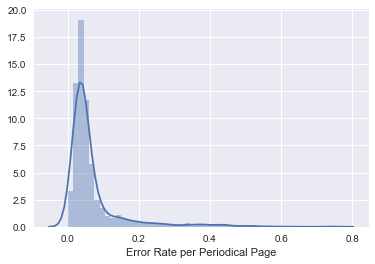

In [17]:
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 50 )[:50]

[('e', 4078),
 ('t', 2604),
 ('w', 2471),
 ('m', 1965),
 ('r', 1826),
 ('n', 1635),
 ('f', 1386),
 ('-', 1369),
 ("'", 1273),
 ('d', 1230),
 ('tion', 819),
 ('g', 778),
 ('u', 635),
 ('re', 614),
 ('k', 475),
 ('co', 409),
 ('th', 352),
 ('ex', 344),
 ('chil', 324),
 ('dren', 324),
 ('educa', 319),
 ('ment', 309),
 ('x', 285),
 ('ers', 210),
 ('tions', 206),
 ('edu', 173),
 ('ence', 162),
 ('pre', 157),
 ('un', 157),
 ('ac', 138),
 ('mis', 135),
 ('ple', 131),
 ('z', 131),
 ('tian', 131),
 ('ith', 129),
 ('tional', 128),
 ('q', 114),
 ('ful', 112),
 ('es', 105),
 ('al', 100),
 ('ap', 98),
 ('ments', 98),
 ('ent', 97),
 ('fr', 97),
 ('ber', 92),
 ('peo', 92),
 ('em', 89),
 ('prin', 86),
 ('ture', 85),
 ('ucation', 84)]

## Correction 3 -- Correct Line Endings

Our third correction will be to address line-endings that the OCR engine did not rejoin into a single token. This will done by identifying the following pattern: word- word and transforming it to: wordword.

In [19]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction3

Average verified rate: 0.9475463094540847

Average of error rates: 0.0680223315669947

Total token count: 1273714



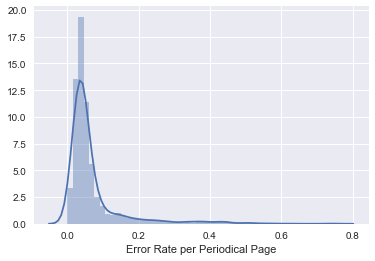

In [20]:
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 50 )[:50]

[('e', 4078),
 ('t', 2595),
 ('w', 2469),
 ('m', 1958),
 ('r', 1825),
 ('n', 1635),
 ('f', 1383),
 ('-', 1353),
 ("'", 1273),
 ('d', 1230),
 ('tion', 812),
 ('g', 777),
 ('u', 634),
 ('re', 614),
 ('k', 474),
 ('co', 409),
 ('th', 351),
 ('ex', 344),
 ('chil', 324),
 ('dren', 322),
 ('educa', 319),
 ('ment', 303),
 ('x', 284),
 ('tions', 205),
 ('ers', 203),
 ('edu', 173),
 ('ence', 161),
 ('pre', 157),
 ('un', 157),
 ('ac', 139),
 ('mis', 135),
 ('ple', 131),
 ('z', 131),
 ('ith', 129),
 ('tional', 128),
 ('tian', 128),
 ('q', 114),
 ('ful', 112),
 ('es', 105),
 ('al', 100),
 ('ap', 98),
 ('ments', 98),
 ('fr', 97),
 ('ent', 96),
 ('ber', 92),
 ('peo', 92),
 ('em', 89),
 ('prin', 86),
 ('ucation', 84),
 ('ture', 82)]

## Correction 4 -- Remove Extra Dashes

In [22]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction4

Average verified rate: 0.9491645050465717

Average of error rates: 0.06563361090083271

Total token count: 1273736



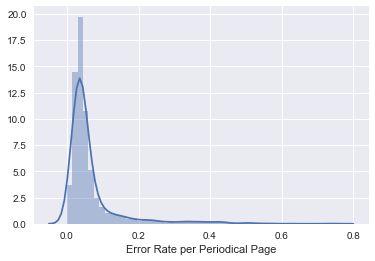

In [23]:
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 20 )[:50]

[('e', 4097),
 ('t', 2611),
 ('w', 2484),
 ('m', 1970),
 ('r', 1838),
 ('n', 1645),
 ('f', 1392),
 ("'", 1287),
 ('d', 1240),
 ('tion', 812),
 ('g', 782),
 ('u', 640),
 ('re', 619),
 ('k', 476),
 ('co', 445),
 ('th', 352),
 ('ex', 345),
 ('chil', 325),
 ('dren', 322),
 ('educa', 322),
 ('ment', 303),
 ('x', 289),
 ('tions', 205),
 ('ers', 204),
 ('edu', 175),
 ('pre', 162),
 ('ence', 161),
 ('un', 160),
 ('ac', 139),
 ('mis', 135),
 ('z', 132),
 ('ple', 131),
 ('ith', 129),
 ('tian', 128),
 ('tional', 128),
 ('q', 115),
 ('ful', 112),
 ('es', 105),
 ('al', 101),
 ('ap', 98),
 ('ments', 98),
 ('fr', 97),
 ('ent', 96),
 ('peo', 93),
 ('ber', 92),
 ('em', 89),
 ('prin', 86),
 ('ucation', 84),
 ('ll', 83),
 ('ture', 82)]

## Correction 5 -- Remove Extra Quotation Marks

In [25]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction5

Average verified rate: 0.9493657966718064

Average of error rates: 0.06538493565480696

Total token count: 1273724



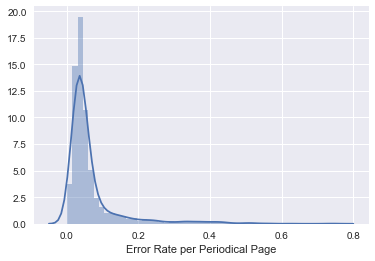

In [26]:
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 20 )[:50]

[('e', 4099),
 ('t', 2616),
 ('w', 2489),
 ('m', 1976),
 ('r', 1843),
 ('n', 1645),
 ('f', 1392),
 ("'", 1262),
 ('d', 1240),
 ('tion', 812),
 ('g', 783),
 ('u', 640),
 ('re', 620),
 ('k', 477),
 ('co', 445),
 ('th', 354),
 ('ex', 345),
 ('chil', 325),
 ('dren', 322),
 ('educa', 322),
 ('ment', 303),
 ('x', 291),
 ('tions', 205),
 ('ers', 205),
 ('edu', 175),
 ('pre', 162),
 ('ence', 161),
 ('un', 160),
 ('ac', 139),
 ('mis', 135),
 ('z', 132),
 ('ple', 131),
 ('ith', 129),
 ('tian', 128),
 ('tional', 128),
 ('q', 115),
 ('ful', 112),
 ('es', 107),
 ('al', 101),
 ('ap', 98),
 ('ments', 98),
 ('fr', 97),
 ('ent', 96),
 ('peo', 94),
 ('ber', 92),
 ('em', 89),
 ('prin', 86),
 ('ucation', 84),
 ('ll', 83),
 ('ture', 82)]

## Correction 6 -- Rejoin Burst Words

In [28]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction6

Average verified rate: 0.9515400232590228

Average of error rates: 0.063221044663134

Total token count: 1268325



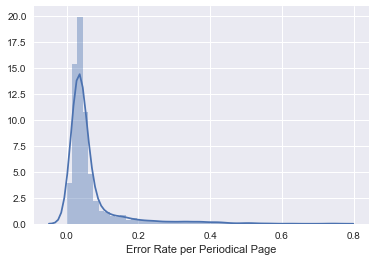

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 3307),
 ('w', 2412),
 ('t', 2107),
 ('m', 1846),
 ('r', 1406),
 ('f', 1339),
 ('n', 1304),
 ("'", 1262),
 ('d', 926),
 ('tion', 812),
 ('g', 650),
 ('re', 617),
 ('u', 509),
 ('co', 438),
 ('k', 438),
 ('th', 353),
 ('ex', 345),
 ('chil', 325),
 ('dren', 322),
 ('educa', 322),
 ('ment', 303),
 ('x', 282),
 ('ers', 205),
 ('tions', 205),
 ('edu', 175),
 ('pre', 162),
 ('ence', 161),
 ('un', 160),
 ('ac', 139),
 ('mis', 135),
 ('ple', 131),
 ('ith', 129),
 ('z', 129),
 ('tian', 128),
 ('tional', 128),
 ('q', 112),
 ('ful', 112),
 ('es', 107),
 ('al', 101),
 ('ap', 98),
 ('ments', 98),
 ('fr', 97),
 ('ent', 96),
 ('peo', 94),
 ('ber', 92),
 ('em', 88),
 ('ucation', 86),
 ('prin', 86),
 ('ll', 83),
 ('ture', 82)]

## Correction 7 -- Rejoin Split Words


In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction7

Average verified rate: 0.9620770901564865

Average of error rates: 0.05361544284632855

Total token count: 1260109



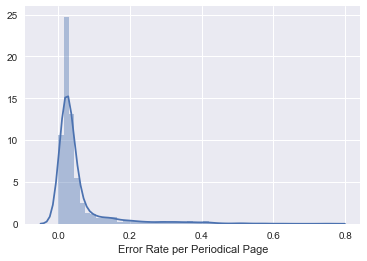

In [32]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 3160),
 ('w', 2406),
 ('t', 2080),
 ('m', 1845),
 ('r', 1361),
 ('f', 1338),
 ('n', 1279),
 ("'", 1262),
 ('d', 912),
 ('g', 644),
 ('u', 506),
 ('k', 435),
 ('co', 353),
 ('x', 280),
 ('ment', 275),
 ('th', 230),
 ('ers', 191),
 ('tion', 153),
 ('re', 143),
 ('z', 129),
 ('tian', 128),
 ('ith', 126),
 ('q', 112),
 ('ence', 107),
 ('fr', 92),
 ('ful', 89),
 ('ex', 87),
 ('ucation', 86),
 ('ll', 82),
 ('tions', 79),
 ('ments', 76),
 ('ofthe', 74),
 ('ent', 73),
 ('struction', 73),
 ('pp', 71),
 ('hy', 67),
 ('lege', 64),
 ('ay', 63),
 ('ft', 61),
 ('ary', 59),
 ('ance', 59),
 ('ents', 57),
 ('io', 55),
 ('ure', 52),
 ('ber', 51),
 ('bers', 51),
 ('il', 49),
 ('ual', 48),
 ('tle', 46),
 ('ference', 46)]

## Correction 9 -- Rejoin Split Words II

Run through the joining functions again.

In [34]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction9"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
#         print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction9

Average verified rate: 0.9677998391667305

Average of error rates: 0.04839023467070402

Total token count: 1253472



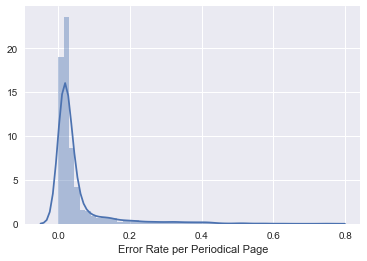

In [35]:
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [36]:
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 3145),
 ('t', 2054),
 ('w', 1969),
 ('m', 1494),
 ('r', 1353),
 ('f', 1337),
 ('n', 1268),
 ("'", 1262),
 ('d', 899),
 ('g', 636),
 ('u', 503),
 ('k', 432),
 ('co', 352),
 ('x', 280),
 ('th', 226),
 ('z', 129),
 ('q', 112),
 ('fr', 92),
 ('ment', 88),
 ('tion', 80),
 ('re', 75),
 ('ofthe', 74),
 ('pp', 71),
 ('ex', 68),
 ('ers', 57),
 ('ft', 56),
 ('io', 55),
 ('mo', 44),
 ('mt', 43),
 ('il', 42),
 ('ky', 41),
 ('si', 39),
 ('oi', 38),
 ('ol', 34),
 ('ucation', 34),
 ('--', 33),
 ('va', 32),
 ('es', 31),
 ('dren', 30),
 ('tbe', 30),
 ('bo', 29),
 ('tlie', 29),
 ('jt', 28),
 ('pa', 27),
 ('al', 26),
 ('ma', 26),
 ('op', 26),
 ('ou', 26),
 ('pm', 26),
 ('chil', 26)]

## Review Remaining Errors

In [37]:
reports.docs_with_high_error_rate( summary, min_error_rate = .2 )

[('ADV18990101-V01-01-page1.txt', 0.75),
 ('ADV19021101-V04-11-page36.txt', 0.625),
 ('ADV18990601-V01-06-page3.txt', 0.583),
 ('ADV19020801-V04-08-page36.txt', 0.571),
 ('ADV19011201-V03-10-page34.txt', 0.561),
 ('ADV19000401-V02-04-page68.txt', 0.533),
 ('ADV19020101-V04-01-page35.txt', 0.524),
 ('ADV19001001-V02-10-page38.txt', 0.514),
 ('ADV19020301-V04-03-page35.txt', 0.51),
 ('ADV19000101-V02-01-page1.txt', 0.509),
 ('ADV18990601-V01-06-page38.txt', 0.5),
 ('ADV19000301-V02-03-page39.txt', 0.5),
 ('ADV19001001-V02-10-page2.txt', 0.473),
 ('ADV19010101-V03-01-page40.txt', 0.468),
 ('ADV19010201-V03-02-page3.txt', 0.445),
 ('ADV19001001-V02-10-page1.txt', 0.444),
 ('ADV18991101-V01-10-page2.txt', 0.444),
 ('ADV19000401-V02-04-page2.txt', 0.439),
 ('ADV19001201-V02-12-page2.txt', 0.427),
 ('ADV19020801-V04-08-page1.txt', 0.426),
 ('ADV19010601-V03-06-page3.txt', 0.425),
 ('ADV19010201-V03-02-page39.txt', 0.419),
 ('ADV19010301-V03-03-page41.txt', 0.419),
 ('ADV19000801-V02-08-page35

### ADV18990101-V01-01-page1.txt
+ Cover page
+ Available text was :
"Published Monthly. Training School Advocate January, 1899. Battle Creek College, Battle Creek, Mich. Vol. 1. No. 1."
+ OCR was " WvniwniiAr 'Cnn i m"

### ADV18990601-V01-06-page3.txt
+ Image
+ Available text was : "The College (Main Building)"
+ OCR was " Th e Co l l e g e  Ma in Bu il d in g  ."

### ADV19011201-V03-10-page34.txt
+ Advertisement page
+ Lots of flourishes resulting in a very confused OCR transcription

### ADV19001001-V02-10-page2.txt
+ Table of contents page.
+ Lots of split words

### Summary
High error pages tend to be cover pages, pages with images, advertisements, and table of contents. Of these, advertisements have the most content that might be of interest for my study. 

In [38]:
reports.long_errors(errors_summary, min_length=15)

(['terlyreportabetterone',
  'achristianschool',
  'tobedrawnfromthischapter',
  'rririj-ijirirurrt',
  'itwillcontainlive',
  'itbecomesthefirstdutyof',
  'hssshsbshshshshieshsh',
  'fromthepenofsister',
  'patriarchsandprophets',
  'vwvwvwwvwvwwwvwwvwwwvwwv',
  'thewavesofthesea',
  'andtoldmeicouldsay',
  'sell-improvement',
  'anychurchschoolhasarighttobecome',
  'nrnjtjtjtjtjijmnjuuxrijt',
  'thelessonsareinteresting',
  'themarriagesapper',
  'ishardlytobeconceived',
  'wasfirstpublishedintheinterestsofa',
  'iruxrijirutitjxrutjtj',
  'verysensitivetotheinfluenceoflight',
  'thepeachesbeallyourown',
  'yousufelyneedatoncethelessonsandcounselcon',
  'howmissionariesaremade',
  'membersarestudentteachers',
  'rliirirlrlnjxrvvuxrlrlruirijtjm',
  'ingbythewordofgod',
  'tolovetheebettereveryday',
  'mxnruiixmuuuuxnrltu',
  'thelittleboywill',
  'rutrutrutnjrritijtjijtj',
  'thisisoneofseveral',
  'themotherasateacher',
  'qrmrninjxnjrnjtjtj',
  'thealedochurchschool',
  'ofthosenowat

## Correction 10 -- Remove long error tokens

In [39]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction10"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    sub_list = ["e|E", "n|N", "u|U", "x|X", "t|T", "b|B", "a|A", "w|W", "s|S", "x|X", "k|K"]
    
    replacements = []
    for sub in sub_list:
        replacements.append(clean.check_for_repeating_characters(tokens, sub))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ADV18991101-V01-10-page32.txt: [('Iknowhadneedoneeveningtopassbetween', ' ')]
ADV19000101-V02-01-page31.txt: [('uvuinnimruuinrumruuiJinjTnnJviJvarinjTruuuuuvrinjimuxrirLrLruinjLnnnnnnnjiJxtJ', ' '), ('uvuinnimruuinrumruuiJinjTnnJviJvarinjTruuuuuvrinjimuxrirLrLruinjLnnnnnnnjiJxtJ', ' ')]
ADV19000101-V02-01-page32.txt: [('imnjiTLruiruinjxajruanniixuxruxnixrumrTxirmivxiirxnJxrinruaJuixinnTiniXJtrtruxrinnrufe', ' ')]
ADV19000101-V02-01-page35.txt: [('KKKKKKKKKKKKK', ' '), ('KKKKSKKKKSKKKS', ' ')]
ADV19000201-V02-02-page39.txt: [('EEEESEEEEEEEEEEEEEEEEESEEEEEEES', ' '), ('EEEEEEEEEEEEEEEESKEEEEEEEEEEEEEEE', ' ')]
ADV19000301-V02-03-page35.txt: [("JrLruu-u-LruLrumj'uuuu'UTjinjuvuiririjutjuuutjuuutjtjutj-ij-iju'ij", ' '), ('uiruuiruLTuu-uuirLnrxnjirirb', ' ')]
ADV19000301-V02-03-page38.txt: [('iKKKKKXXKKXKKKKKKKSKKKKKKKKKSI', ' ')]
ADV19000301-V02-03-page39.txt: [('EEEESEEEEEEEEEEEEEEEESEEEEEEEEEEE', ' ')]
ADV19000401-V02-04-page57.txt: [('xratJTJTJTJTrin.TJuuu-ltltltltuutjtjtjtjtxltuuxrmjxnj

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction10

Average verified rate: 0.9678376476557775

Average of error rates: 0.04819682059046178

Total token count: 1253422



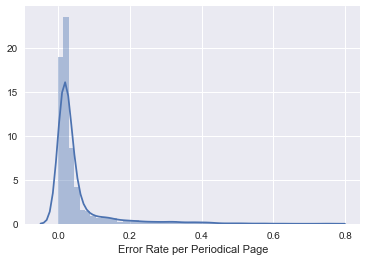

In [40]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [41]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 3145),
 ('t', 2054),
 ('w', 1969),
 ('m', 1494),
 ('r', 1353),
 ('f', 1337),
 ('n', 1268),
 ("'", 1262),
 ('d', 899),
 ('g', 636),
 ('u', 503),
 ('k', 432),
 ('co', 352),
 ('x', 280),
 ('th', 226),
 ('z', 129),
 ('q', 112),
 ('fr', 92),
 ('ment', 88),
 ('tion', 80),
 ('re', 75),
 ('ofthe', 74),
 ('pp', 71),
 ('ex', 68),
 ('ers', 57),
 ('ft', 56),
 ('io', 55),
 ('mo', 44),
 ('mt', 43),
 ('il', 42),
 ('ky', 41),
 ('si', 39),
 ('oi', 38),
 ('ol', 34),
 ('ucation', 34),
 ('--', 33),
 ('va', 32),
 ('es', 31),
 ('dren', 30),
 ('tbe', 30),
 ('bo', 29),
 ('tlie', 29),
 ('jt', 28),
 ('pa', 27),
 ('al', 26),
 ('ma', 26),
 ('op', 26),
 ('ou', 26),
 ('pm', 26),
 ('chil', 26)]

## Correction 11 -- Correct common OCR character substitutions

In [42]:
# %load shared_elements/make_common_substitutions.py
prev = cycle
cycle = "correction11"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

f = utilities.readfile('/Users/jeriwieringa/Dissertation/drafts/data', 'common_substitutions.txt')  
sub_list = f.split('\n')
common_substitutions = [tuple(i.split('\t')) for i in sub_list]
    
corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    errors = reports.identify_errors(tokens, spelling_dictionary)
    errors_updated = []
    for error in errors:
        if not error.lower() in spelling_dictionary:
            errors_updated.append(error)
            
    replacements = []
    for error in errors_updated:
        if len(error) > 1:
            for sub in common_substitutions:
                pattern = sub[0]
                if re.search(pattern, error):
                    test_sub = re.sub(pattern, sub[1], error)
                    if test_sub.lower() in spelling_dictionary:
                        replacements.append((error, test_sub))

    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)  
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ADV18981201-V02-01-page11.txt: [('tlie', 'the')]
ADV18981201-V02-01-page14.txt: [('bv', 'by')]
ADV18981201-V02-01-page16.txt: [('wliat', 'what'), ('Ood', 'God')]
ADV18981201-V02-01-page17.txt: [('ve', 'ye')]
ADV18981201-V02-01-page18.txt: [('witli', 'with')]
ADV18981201-V02-01-page19.txt: [('vour', 'your')]
ADV18981201-V02-01-page26.txt: [('coine', 'come')]
ADV18981201-V02-01-page7.txt: [('bv', 'by')]
ADV18990101-V01-01-page30.txt: [('youtli', 'youth')]
ADV18990101-V01-01-page36.txt: [('Cedak', 'Cedar')]
ADV18990101-V01-01-page43.txt: [('OP', 'OF')]
ADV18990101-V01-01-page45.txt: [('Ollice', 'Office')]
ADV18990101-V01-01-page6.txt: [('liow', 'how')]
ADV18990201-V01-02-page13.txt: [('trutli', 'truth')]
ADV18990201-V01-02-page2.txt: [('DRUOS', 'DRUGS'), ('Mk', 'Mr')]
ADV18990201-V01-02-page23.txt: [('tlio', 'tho')]
ADV18990201-V01-02-page35.txt: [('tains', 'tams')]
ADV18990201-V01-02-page42.txt: [('liave', 'have')]
ADV18990201-V01-02-page47.txt: [('tlio', 'tho')]
ADV18990201-V01-02-page5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction11

Average verified rate: 0.9679373657943816

Average of error rates: 0.04783913701741106

Total token count: 1254139



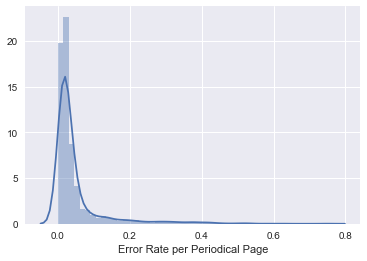

In [43]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [44]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 3207),
 ('t', 2060),
 ('w', 2041),
 ('m', 1502),
 ('r', 1375),
 ('f', 1338),
 ('n', 1287),
 ("'", 1262),
 ('d', 916),
 ('g', 637),
 ('u', 504),
 ('k', 432),
 ('co', 353),
 ('x', 280),
 ('th', 226),
 ('z', 129),
 ('q', 112),
 ('fr', 92),
 ('ment', 89),
 ('tion', 80),
 ('re', 79),
 ('ofthe', 74),
 ('pp', 71),
 ('ers', 68),
 ('ex', 68),
 ('ft', 56),
 ('io', 55),
 ('il', 47),
 ('ry', 47),
 ('mo', 44),
 ('mt', 43),
 ('ky', 41),
 ('si', 39),
 ('oi', 38),
 ('bo', 36),
 ('ol', 34),
 ('ucation', 34),
 ('--', 33),
 ('es', 33),
 ('va', 32),
 ('se', 31),
 ('tbe', 30),
 ('dren', 30),
 ('al', 28),
 ('jt', 28),
 ('ga', 28),
 ('fi', 27),
 ('pa', 27),
 ('ma', 26),
 ('pm', 26)]

## Correction 12 -- Separate Squashed Words

In [45]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction12"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

ADV18981201-V02-01-page9.txt: [('comeswillseetoitthattheyare', 'comes will see to it that they are')]
ADV18990101-V01-01-page13.txt: [('ThearticleintheAdvocate', 'The article in the Advocate'), ('fromthepenofSister', 'from the pen of Sister')]
ADV18990101-V01-01-page21.txt: [('asifyouwereworkingforyourlifetosave', 'as if you were working for your life to save')]
ADV18990101-V01-01-page45.txt: [('officewillbeopenfrom', 'office will be open from')]
ADV18990101-V01-01-page50.txt: [('VocalandInstrumentalMusic', 'Vocal and In st ru mental Music'), ('SecretaryofFaculty', 'Secretary of Faculty')]
ADV18990201-V01-02-page62.txt: [('AddresscorrespondencetoThe', 'Address correspondence to The')]
ADV18990201-V01-02-page63.txt: [('BattleGreekPreparatorySchool', 'Battle Greek Preparatory School'), ('IndustrialDepartment', 'Industrial Department'), ('SecretaryofFaculty', 'Secretary of Faculty')]
ADV18990201-V01-02-page65.txt: [('Westfollowingcities', 'West following cities')]
ADV18990301-V01-03-page3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/ADV/correction12

Average verified rate: 0.9686531689441092

Average of error rates: 0.04687282361847085

Total token count: 1257990



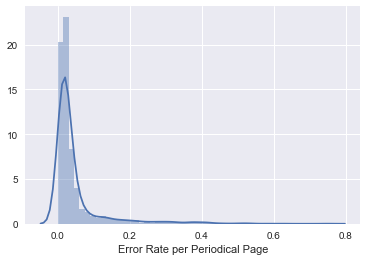

In [46]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [47]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 3215),
 ('t', 2066),
 ('w', 2042),
 ('m', 1502),
 ('r', 1381),
 ('f', 1338),
 ('n', 1292),
 ("'", 1262),
 ('d', 917),
 ('g', 638),
 ('u', 506),
 ('k', 433),
 ('co', 353),
 ('x', 281),
 ('th', 226),
 ('z', 129),
 ('q', 112),
 ('fr', 92),
 ('ment', 89),
 ('tion', 80),
 ('re', 79),
 ('ofthe', 74),
 ('pp', 71),
 ('ers', 68),
 ('ex', 68),
 ('ft', 56),
 ('io', 55),
 ('il', 47),
 ('ry', 47),
 ('mo', 44),
 ('mt', 43),
 ('ky', 41),
 ('si', 39),
 ('oi', 38),
 ('bo', 36),
 ('ol', 34),
 ('ucation', 34),
 ('--', 33),
 ('es', 33),
 ('va', 32),
 ('se', 31),
 ('tbe', 30),
 ('dren', 30),
 ('al', 28),
 ('jt', 28),
 ('ga', 28),
 ('fi', 27),
 ('pa', 27),
 ('ma', 26),
 ('pm', 26)]

## System Information

In [48]:
# %load ../../shared_elements/system_info.py
import IPython
print (IPython.sys_info())
!pip freeze

{'commit_hash': '5c9c918',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Users/jeriwieringa/miniconda3/envs/dissertation2/lib/python3.5/site-packages/IPython',
 'ipython_version': '5.1.0',
 'os_name': 'posix',
 'platform': 'Darwin-16.4.0-x86_64-i386-64bit',
 'sys_executable': '/Users/jeriwieringa/miniconda3/envs/dissertation2/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.5.2 |Continuum Analytics, Inc.| (default, Jul  2 2016, '
                '17:52:12) \n'
                '[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]'}
alabaster==0.7.10
anaconda-client==1.5.5
appnope==0.1.0
argh==0.26.1
Babel==2.3.4
beautifulsoup4==4.5.3
blinker==1.4
bokeh==0.12.4
boto==2.43.0
bz2file==0.98
chest==0.2.3
cleanOCR==0.1
cloudpickle==0.2.1
clyent==1.2.2
cycler==0.10.0
dask==0.12.0
datashader==0.4.0
datashape==0.5.2
decorator==4.0.11
docutils==0.13.1
doit==0.29.0
gensim==0.12.4
Ghost.py==0.2.3
ghp-import2==1.0.1
GoH==0.1
gspread==0.4.1
HeapDict==1